In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [2]:
sm = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
sm=sm.iloc[::-1]
sm.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
sm1 = sm[['Date','Open','Close']]
sm1.head()

,Date,Open,Close
2034,2010-07-21,122.1,121.55
2033,2010-07-22,120.3,120.90
2032,2010-07-23,121.8,120.65
2031,2010-07-26,120.1,117.60
2030,2010-07-27,117.6,118.65


In [4]:
sm1.isna().sum()

Date     0
Open     0
Close    0
dtype: int64

In [5]:
sm1.shape

(2035, 3)

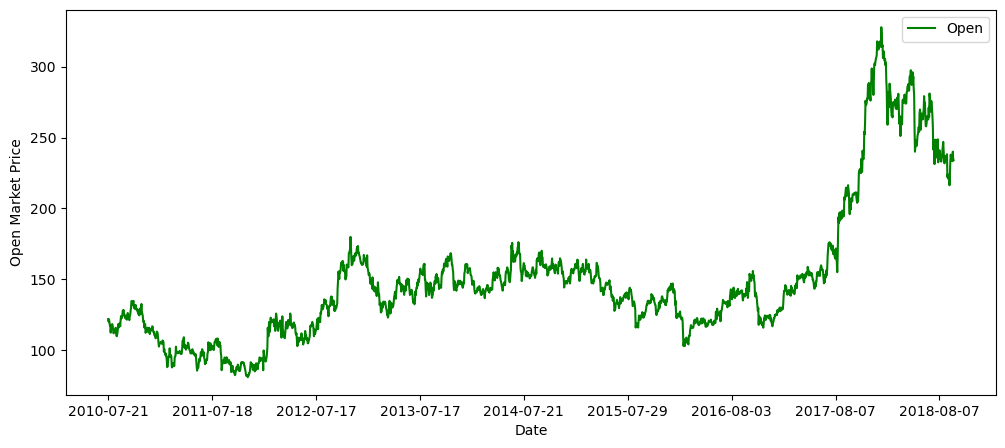

In [6]:
sm1.plot(x="Date",y="Open",figsize=(12,5),ylabel="Open Market Price",color="green")
plt.show()

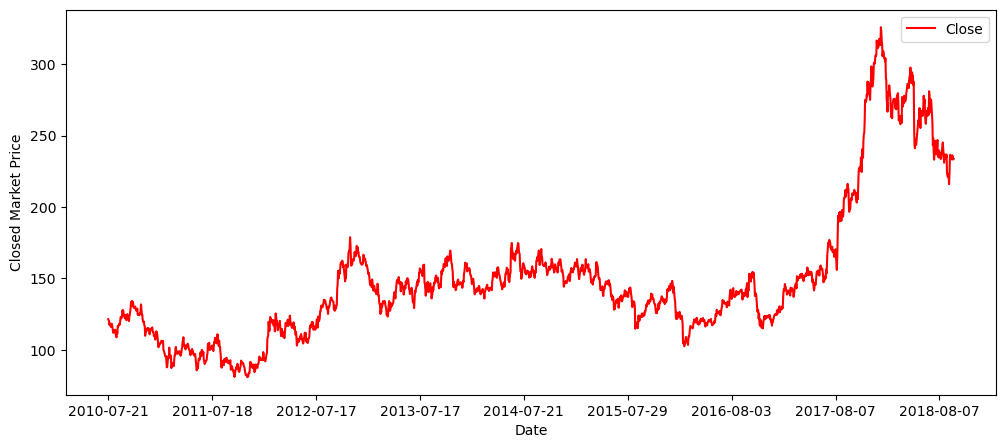

In [7]:
sm1.plot(x="Date",y="Close",figsize=(12,5),ylabel="Closed Market Price",color="red")
plt.show()

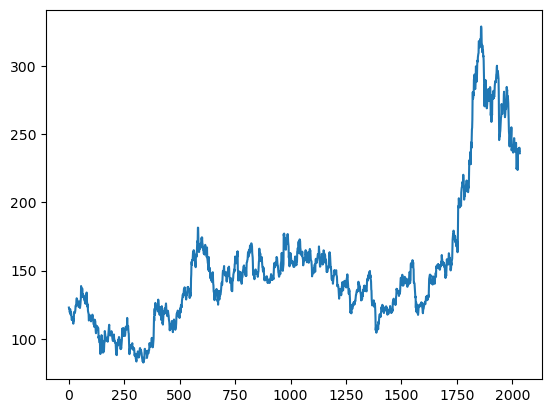

In [8]:
sm_high=sm.reset_index()['High']
plt.plot(sm_high)

In [9]:
scaler = MinMaxScaler(feature_range = (0,1))
sm_high = scaler.fit_transform(np.array(sm_high).reshape(-1,1))

In [10]:
sm_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [11]:
training_size = int(len(sm_high) * 0.80)
test_size = len(sm_high) - training_size
train_data, test_data = sm_high[0:training_size,:], sm_high[training_size:len(sm_high),:1]
training_size, test_size

(1628, 407)

In [12]:
def create_dataset(dataset, time_step = 1):
    x, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i+time_step, 0])
    return np.array(x), np.array(y)

In [13]:
time_step = 90
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape), print(y_train.shape)

(1537, 90, 1)
(1537,)


(None, None)

In [15]:
print(x_test.shape), print(y_test.shape)

(316, 90, 1)
(316,)


(None, None)

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 80, batch_size = 60, verbose = 1)

Epoch 1/80
26/26 [==============================] - 18s 303ms/step - loss: 0.0102 - val_loss: 0.0263
Epoch 2/80
26/26 [==============================] - 7s 253ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 3/80
26/26 [==============================] - 7s 256ms/step - loss: 8.3295e-04 - val_loss: 0.0087
Epoch 4/80
26/26 [==============================] - 8s 303ms/step - loss: 8.1784e-04 - val_loss: 0.0098
Epoch 5/80
26/26 [==============================] - 8s 302ms/step - loss: 7.7638e-04 - val_loss: 0.0061
Epoch 6/80
26/26 [==============================] - 8s 307ms/step - loss: 7.1799e-04 - val_loss: 0.0062
Epoch 7/80
26/26 [==============================] - 8s 318ms/step - loss: 7.0340e-04 - val_loss: 0.0053
Epoch 8/80
26/26 [==============================] - 8s 325ms/step - loss: 6.4907e-04 - val_loss: 0.0068
Epoch 9/80
26/26 [==============================] - 8s 328ms/step - loss: 6.2095e-04 - val_loss: 0.0047
Epoch 10/80
26/26 [==============================] - 9s 329ms/step - lo

Epoch 70/80
26/26 [==============================] - 7s 287ms/step - loss: 1.2481e-04 - val_loss: 0.0029
Epoch 71/80
26/26 [==============================] - 7s 276ms/step - loss: 1.4349e-04 - val_loss: 0.0025
Epoch 72/80
26/26 [==============================] - 7s 260ms/step - loss: 1.2366e-04 - val_loss: 0.0017
Epoch 73/80
26/26 [==============================] - 8s 291ms/step - loss: 1.1633e-04 - val_loss: 9.4241e-04
Epoch 74/80
26/26 [==============================] - 8s 297ms/step - loss: 1.1555e-04 - val_loss: 0.0021
Epoch 75/80
26/26 [==============================] - 7s 287ms/step - loss: 1.1993e-04 - val_loss: 0.0030
Epoch 76/80
26/26 [==============================] - 7s 275ms/step - loss: 1.1636e-04 - val_loss: 0.0014
Epoch 77/80
26/26 [==============================] - 8s 293ms/step - loss: 1.1375e-04 - val_loss: 0.0017
Epoch 78/80
26/26 [==============================] - 7s 270ms/step - loss: 1.1190e-04 - val_loss: 0.0010
Epoch 79/80
26/26 [==============================] 

In [18]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
math.sqrt(mean_squared_error(y_train, train_predict))

135.55024584640515

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

247.37369070274022

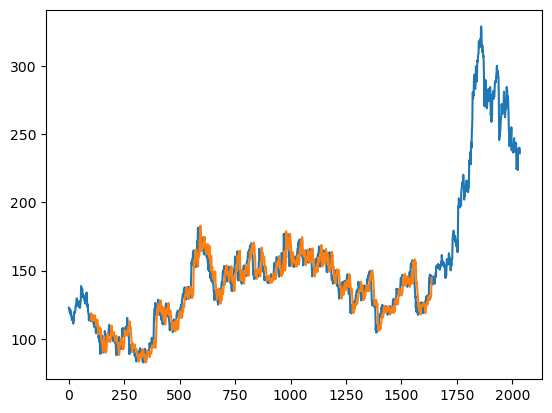

In [26]:
look_back = 100
trainPredictPlot = np.empty_like(sm_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(sm_high)
testPredictPlot[:,:] = np.nan


plt.plot(scaler.inverse_transform(sm_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()